In [53]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
input_image = np.array((
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,255,255,0,0,0,0,0,0],
    [0,0,0,0,0,255,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,0,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,0,0,0],
    [0,0,255,255,255,255,255,255,255,0,0,0,0,0],
    [0,0,255,255,255,255,255,255,255,255,255,255,0,0],
    [0,0,0,0,0,255,255,255,255,0,255,0,0,0],
    [0,0,255,0,255,255,255,255,255,0,255,0,0,0],
    [0,0,255,255,255,255,255,255,255,255,255,0,0,0],
    [0,0,0,0,255,0,0,0,255,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,255,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0],
), dtype="uint8")

input_comp = input_image.copy()

input_comp[input_image == 255] = 0
input_comp[input_image == 0] = 255

kernel = [ np.array((
        [0, 0, 0],
        [-1, 1, 0],
        [0, 0, 0]), dtype="int")
        ,np.array((
        [0, 0, 0],
        [0, 1, -1],
        [0, 0, 0]), dtype="int")
        ,np.array((
        [0, -1, 0],
        [0, 1, 0],
        [0, 0, 0]), dtype="int")
        ,np.array((
        [0, 0, 0],
        [0, 1, 0],
        [0, -1, 0]), dtype="int")]



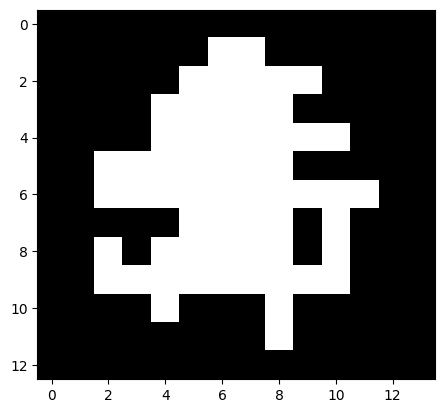

In [49]:
kernel_hold = np.array((
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]), dtype=np.uint8)


erosion1 = cv.erode(input_image,kernel_hold)
plt.imshow(erosion1,cmap="gray")

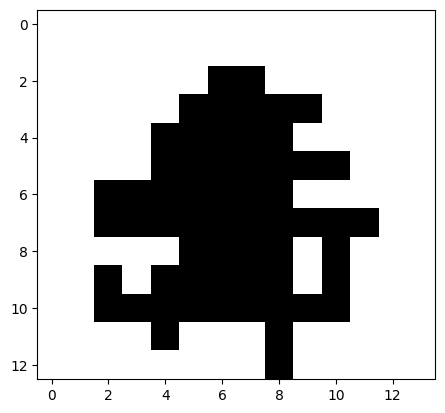

In [48]:
kernel_hold = np.array((
        [0, 1, 0],
        [0, 0, 0],
        [0, 0, 0]), dtype=np.uint8)


erosion2 = cv.erode(input_comp,kernel_hold)
plt.imshow(erosion2,cmap="gray")

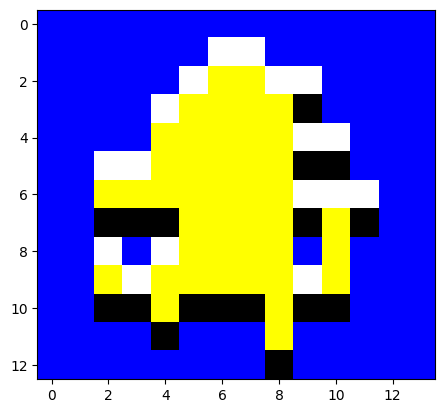

In [52]:
newRGBImage = cv.merge((erosion1,erosion1,erosion2))
plt.imshow(newRGBImage)

In [54]:
output_image = np.zeros(shape=(13, 14))
for item in kernel:
    output_image += cv.morphologyEx(input_image, cv.MORPH_HITMISS, item)
# output_image = cv.morphologyEx(input_image, cv.MORPH_HITMISS, kernel)
rate = 50
input_image = cv.resize(input_image, None, fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
cv.imshow("Original", input_image)
cv.moveWindow("Original", 0, 200)
output_image = cv.resize(output_image, None , fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
cv.imshow("Hit or Miss", output_image)
cv.moveWindow("Hit or Miss", 500, 200)
cv.waitKey(0)
cv.destroyAllWindows()